# Modelos de Regresión Lineal
## Modelo con datos simulados

* $y = a + b*x$

* x : 100 valores distribuidos según una N(1.5,2.5)

* $Ye = 7+1.6*x + e$

* e estará distribuida según una N(0,0.8)

In [96]:
import pandas as pd
import numpy as np

In [97]:
x = 1.5 + (2.5 *np.random.randn(100))

In [98]:
res = 0+(.8*np.random.randn(100))

In [99]:
y_pred = 7 + 1.6 * x

In [100]:
y_act = 7 + 1.6 *x +res

In [101]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [102]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y":y_act_list,
        "y_pred":y_pred_list
    }

)

In [103]:
data.head()

,x,y,y_pred
0,0.040716,8.100863,7.065145
1,4.356691,13.532162,13.970706
2,5.858123,15.537335,16.372997
3,4.541856,13.783001,14.266970
4,3.116663,12.320334,11.986661


In [131]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

In [105]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Actual vs Predicción')

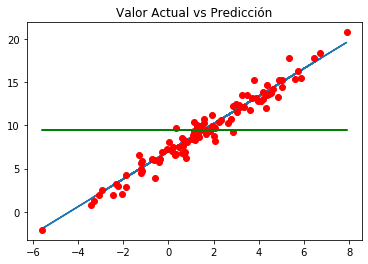

In [106]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [107]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y"])**2
data["SST"] = (data["y"]-np.mean(y_act))**2

In [108]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,0.040716,8.100863,7.065145,5.735330,1.072712,1.847253
1,4.356691,13.532162,13.970706,20.346468,0.192321,16.582502
2,5.858123,15.537335,16.372997,47.789528,0.698330,36.934006
3,4.541856,13.783001,14.266970,23.106962,0.234226,18.688340
4,3.116663,12.320334,11.986661,6.384014,0.111338,8.181511


In [109]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [110]:
SSR

1647.5945385922637

In [111]:
SSD

83.32627417041671

In [112]:
SST

1809.8680376054688

In [113]:
SSR+SSD

1730.9208127626805

In [114]:
R2 = SSR/SST

In [115]:
R2

0.9103395962349279

(array([ 3.,  2.,  7., 13., 19., 27., 15.,  7.,  3.,  4.]),
 array([-2.26276658, -1.7997266 , -1.33668661, -0.87364663, -0.41060665,
         0.05243333,  0.51547331,  0.97851329,  1.44155327,  1.90459325,
         2.36763323]),
 <a list of 10 Patch objects>)

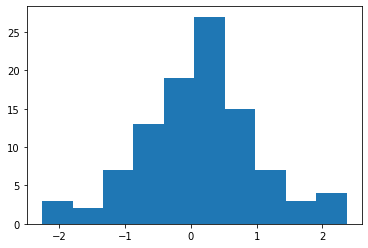

In [116]:
plt.hist(data["y_pred"]-data["y"])

## Obteniendo la recta de regresión

* $y = a+b*x$
* $b = sum((xi-x_m)(yi-y_m))/sum((xi-x_m)^2)$
* $a = y_m - b *x_m$

In [117]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.6058931345068024, 9.459999861115795)

In [119]:
data["beta_n"] = (data["x"]-x_mean)*(data["y"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [120]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [121]:
alpha = y_mean - beta * x_mean

In [122]:
alpha, beta

(6.8270980229042575, 1.6395249357736048)

El modelo lineal obtenido por regresión es: y = 6.8270980229042575 + 1.6395249357736048*x

In [123]:
data["y_model"] = 6.8270980229042575 + 1.6395249357736048*data["x"]

In [124]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.040716,8.100863,7.065145,5.735330,1.072712,1.847253,2.127290,2.449781,6.893852
1,4.356691,13.532162,13.970706,20.346468,0.192321,16.582502,11.201694,7.566889,13.970002
2,5.858123,15.537335,16.372997,47.789528,0.698330,36.934006,25.842228,18.081459,16.431637
3,4.541856,13.783001,14.266970,23.106962,0.234226,18.688340,12.692172,8.619879,14.273585
4,3.116663,12.320334,11.986661,6.384014,0.111338,8.181511,4.321306,2.282425,11.936944


In [128]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [129]:
SSR,SSD,SST

(1728.743938710226, 81.124098895243, 1809.8680376054688)

In [130]:
R2 = SSR/SST
R2

0.9551767879151161

Text(0.5, 1.0, 'Valor Actual vs Predicción')

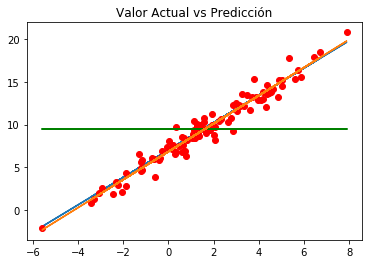

In [132]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")